# Intro

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn import linear_model
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
import statsmodels.api as sm
import statsmodels.formula.api as smf

Talk about why we only used portugese data

In [2]:
data = pd.read_csv("student-por.csv")

# Data Tidying
## Drop irrelevant columns
## rename vague columns

Link or key to table

In [3]:
# data = data.drop(["address",'reason','health'])

In [4]:
data = data.rename(columns={"goout": 'social_activity', 'Pstatus' : 'parental_status', 'Dalc' : 'Weekday_alc', 'Walc' : 'Weekend_alc'})
data = data.replace('yes', 1).replace('no', 0)

In [5]:
data.head()

,school,sex,age,address,famsize,parental_status,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,social_activity,Weekday_alc,Weekend_alc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# EDA

## Profile socioeconomic status Natan
* M/Fedu
* M/Fjob
* internet access
* nursery
* paid

## Alcohol use Ben
* by age
* by gender
* by ses
* by sp
* by grades

## Grades Ben
* by gender
* by ses
* by sp

## Social participation
* We attempt to quantify a student's social experience between 1 and 7, where 1 is the least socially active and 7 is the most. This is based on a student's romantic status, their extra-curricular particiaption, and their social activities outside of school.

* First, look at the quantity of students who participate in each social activity.

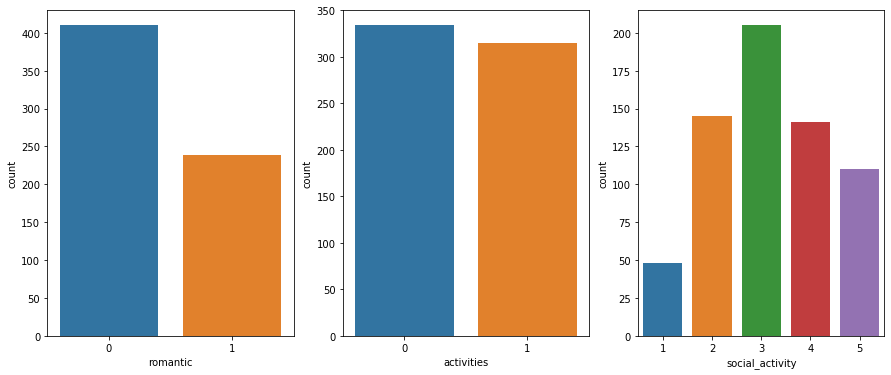

In [6]:
fig, ax = plt.subplots(1,3, figsize=(15,6))
sns.countplot(x='romantic', data=data, ax=ax[0])
sns.countplot(x='activities', data=data, ax=ax[1])
sns.countplot(x='social_activity', data=data, ax=ax[2])

* In order to clarify different correlations between each possible social activity, we looked at a violin plot of each combination of social activities

Text(0.5, 1.0, 'romantic status vs extra-curriculars')

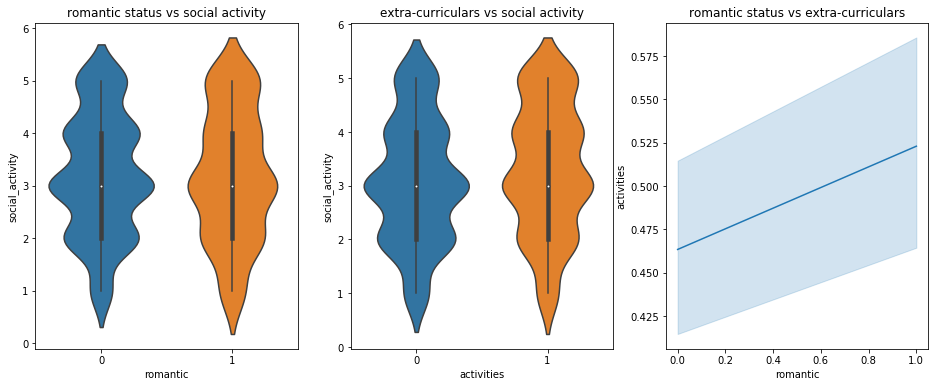

In [7]:
fig, ax = plt.subplots(1,3, figsize=(16,6))
sns.violinplot(x='romantic', y='social_activity', data=data, ax=ax[0]).set_title('romantic status vs social activity')
sns.violinplot(x='activities', y= 'social_activity', data=data, ax=ax[1]).set_title('extra-curriculars vs social activity')
sns.lineplot(x='romantic',y='activities', data=data, ax=ax[2]).set_title('romantic status vs extra-curriculars')

* Next, add a column in our data table that will keep track of each student's total social participation, so that we can see 

In [8]:
data['social_participation'] = data['romantic'] + data['activities'] + data['social_activity']
data.head()

,school,sex,age,address,famsize,parental_status,Medu,Fedu,Mjob,Fjob,...,freetime,social_activity,Weekday_alc,Weekend_alc,health,absences,G1,G2,G3,social_participation
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,3
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,2
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,4
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,2


# # Alcohol use Ben

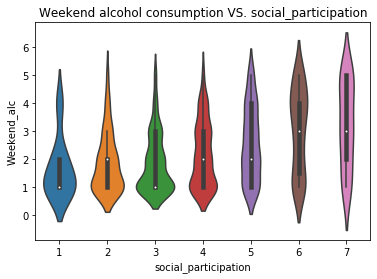

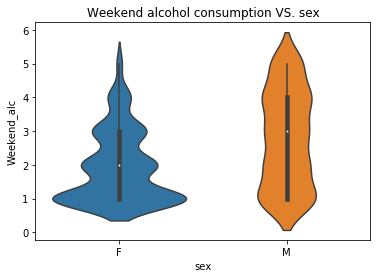

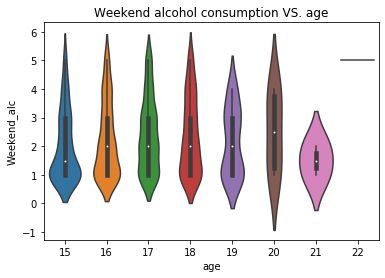

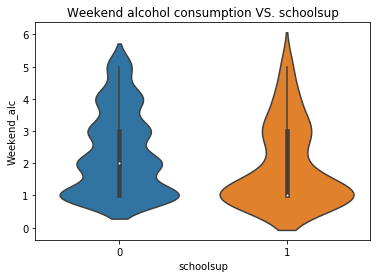

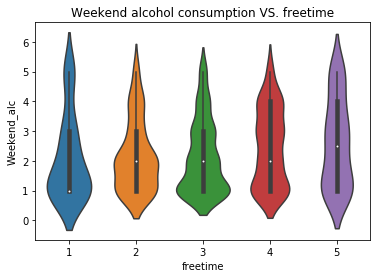

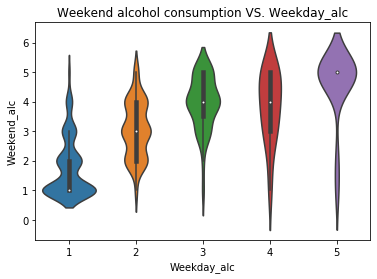

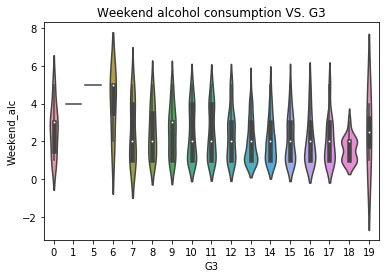

In [9]:
for col in ['social_participation','sex','age','schoolsup','freetime','Weekday_alc','G3']:
    fig, ax = plt.subplots()
    x = col
    y = data.Weekend_alc
    plt.title("Weekend alcohol consumption VS. " + col)
    sns.violinplot(x=data[x], y=y)
    

## Grades Ben


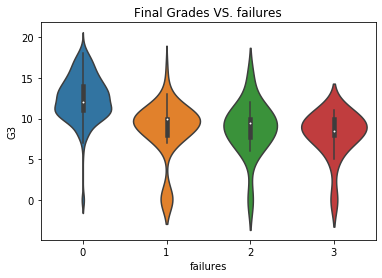

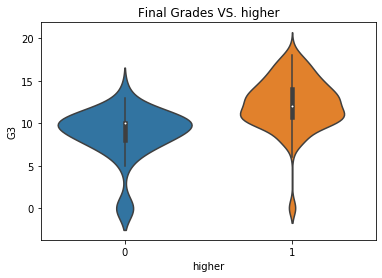

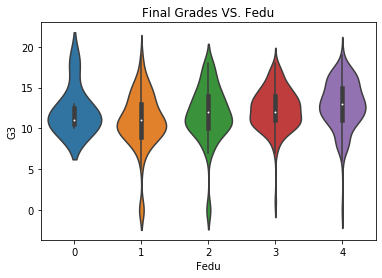

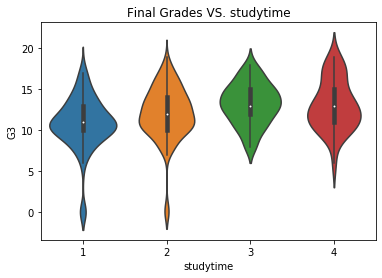

In [10]:
for col in ['failures','higher','Fedu','studytime']:
    fig, ax = plt.subplots()
    x = col
    y = data.G3
    plt.title("Final Grades VS. " + col)
    sns.violinplot(x=data[x], y=y)
    

# Machine Learning
## social participation, ses  predicts alcohol
## alcohol, sp, ses predicts grades